# Reinforcement Learning ETE
# Question 1: Bootstrapping in Grid Worlds

## Topic: Analysis of Autonomous Robot Navigation in Christ University Central Block

**Student Name:** A Anto Kelvin Prabhu 
**Register Number:** 2448501  
**Course:** Reinforcement Learning

---

### Introduction
 the Christ University Central Block as a **3x3 Grid-World** environment. We aim to design an autonomous service robot that navigates from the **Ground Floor Entrance** (Start) to the **Exam Control Room** (Goal). 

Through this scenario, we demonstrate the concept of **Bootstrapping** in Reinforcement Learning, specifically using Temporal Difference (TD) learning methods. We will define the environment, explain the theoretical underpinnings of bootstrapping, manually simulate value updates, and critically reflect on the advantages of this approach compared to Monte Carlo methods.

## Section 1: Environment Representation (8 Marks)

### 1.1 Environment Description
The environment is a discrete 3x3 grid.

- **State Space**: 9 cells corresponding to grid positions $(row, col)$.
- **Start State**: Bottom-Left, represented as `(2, 0)` in matrix notation.
- **Goal State**: Top-Right, represented as `(0, 2)`.
- **Actions**: The robot can move `UP`, `DOWN`, `LEFT`, or `RIGHT`.
- **Rewards**:
  - $-1$ for every step taken (to encourage the shortest path).
  - $+10$ for reaching the Goal state.
- **Dynamics**: Transitions are deterministic. Attempting to move into a wall keeps the robot in the current state.

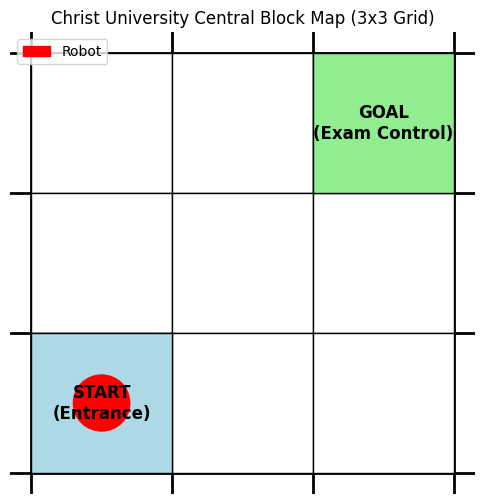

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

class ChristUniversityGrid:
    def __init__(self):
        # Grid dimensions: 3x3
        self.rows = 3
        self.cols = 3
        
        # State definitions (Matrix indexing: row, col)
        # (2,0) is Bottom-Left, (0,2) is Top-Right
        self.start_state = (2, 0)
        self.goal_state = (0, 2)
        self.current_state = self.start_state
        
        # Actions
        self.actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']
        
    def reset(self):
        """Resets the robot to the start position."""
        self.current_state = self.start_state
        return self.current_state
    
    def step(self, action):
        """
        Executes an action and returns (next_state, reward, done).
        Actions: UP, DOWN, LEFT, RIGHT
        """
        r, c = self.current_state
        
        if action == 'UP':
            r = max(r - 1, 0)
        elif action == 'DOWN':
            r = min(r + 1, self.rows - 1)
        elif action == 'LEFT':
            c = max(c - 1, 0)
        elif action == 'RIGHT':
            c = min(c + 1, self.cols - 1)
            
        next_state = (r, c)
        self.current_state = next_state
        
        # Creating the Reward Structure
        if next_state == self.goal_state:
            reward = 10
            done = True
        else:
            reward = -1
            done = False
            
        return next_state, reward, done

    def visualize(self):
        """Visualizes the 3x3 Grid World using Matplotlib."""
        fig, ax = plt.subplots(figsize=(6, 6))
        
        # Draw Grid
        for x in range(self.cols + 1):
            ax.axvline(x, lw=2, color='k', zorder=1)
        for y in range(self.rows + 1):
            ax.axhline(y, lw=2, color='k', zorder=1)
            
        # Color Start and Goal
        # Matplotlib coordinates are (x, y) where x is col, y is inverted row usually or just cartesian.
        # To map matrix (row, col) to plotting (x, y): x=col, y=rows-1-row
        
        # Helper to plot text
        def plot_cell(r, c, text, color):
            x = c
            y = self.rows - 1 - r
            rect = patches.Rectangle((x, y), 1, 1, linewidth=1, edgecolor='k', facecolor=color)
            ax.add_patch(rect)
            ax.text(x + 0.5, y + 0.5, text, ha='center', va='center', fontsize=12, weight='bold')
            
        # Draw all cells white first
        for r in range(self.rows):
            for c in range(self.cols):
                plot_cell(r, c, '', 'white')
        
        # Highlight Start
        plot_cell(2, 0, 'START\n(Entrance)', '#ADD8E6') # Light Blue
        
        # Highlight Goal
        plot_cell(0, 2, 'GOAL\n(Exam Control)', '#90EE90') # Light Green
        
        # Mark Robot Position
        rr, rc = self.current_state
        rx = rc
        ry = self.rows - 1 - rr
        robot = patches.Circle((rx + 0.5, ry + 0.5), 0.2, color='red', label='Robot')
        ax.add_patch(robot)
        
        plt.title('Christ University Central Block Map (3x3 Grid)')
        plt.legend(handles=[robot], loc='upper left')
        plt.axis('off')
        plt.show()

# Instantiate and Visualize
env = ChristUniversityGrid()
env.visualize()

## Section 2: Bootstrapping Explanation (7 Marks)

### 2.1 What is Bootstrapping?
In Reinforcement Learning, **Bootstrapping** refers to updating a value estimate based on other value estimates, rather than waiting for a final actual return (as in Monte Carlo methods). 

We specifically use **Temporal Difference (TD) learning**, which combines ideas from Monte Carlo and Dynamic Programming. TD methods update estimates based in part on other learned estimates, without waiting for a final outcome (they "bootstrap").

#### Key Concept: TD(0)
The simplest form of bootstrapping is TD(0), where the value of a state $V(S)$ is updated immediately after transitioning to the next state $S'$ and receiving reward $R$.

### 2.2 The TD Update Formula
The mathematical update rule for state-value TD(0) learning is:

$$
V(S) \leftarrow V(S) + \alpha [R + \gamma V(S') - V(S)]
$$

Where:
- $V(S)$: Current estimated value of state $S$.
- $\alpha$ (alpha): Learning rate ($0 < \alpha \le 1$).
- $R$: Immediate reward received after action.
- $\gamma$ (gamma): Discount factor ($0 \le \gamma \le 1$).
- $V(S')$: Estimated value of the next state (the "bootstrap" target).
- $[R + \gamma V(S') - V(S)]$: This term is called the **TD Error** ($\delta_t$).

### 2.3 Real-World Justification
**Why is bootstrapping useful for our Robot?**

Imagine the robot navigating the Christ University campus continuously:
1.  **Continuous Learning**: The robot does not need to wait until the end of the day (or the end of an "episode") to learn. It learns with *every single step* it takes. If it moves from the Entrance to the Hallway and realizes the Hallway is good, it immediately updates its opinion of the Entrance.
2.  **Efficiency**: In a large environment, episodes might be very long. Bootstrapping allows for faster propagation of value information.
3.  **Safety**: If the robot takes a bad step (e.g., towards a staircase it can't climb), it learns immediately to avoid that previous state, rather than waiting until it crashes or finishes a task to realize the mistake.

## Section 3: State-Value Updates (5 Marks)

### 3.1 Simulation Setup
We will simulate a single short episode where the robot moves from Start to Goal.
**Path**: Start (2,0) $\to$ Up (1,0) $\to$ Right (1,1) $\to$ Up (0,1) $\to$ Right (0,2) [Goal]

**Parameters**:
- Learning Rate $\alpha = 0.5$
- Discount Factor $\gamma = 0.9$
- Initial State Values $V(s) = 0$ for all states.

We will calculate the new $V(S)$ manually at each step using the formula:
$V_{new}(S) = V_{old}(S) + 0.5 * [R + 0.9 * V_{old}(S') - V_{old}(S)]$

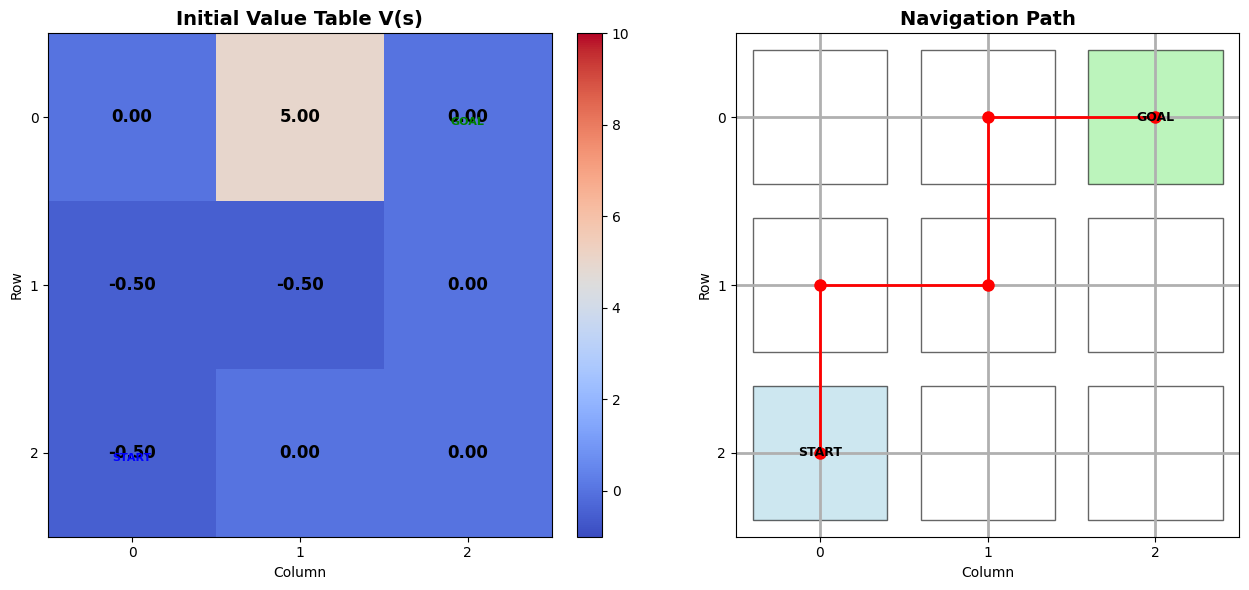

Initial Value Table V(s):
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
--------------------------------------------------
Step-by-Step Updates:

Step 1: Move from (2, 0) to (1, 0)
  Reward R = -1
  V((2, 0)) <- 0.0 + 0.5 * [-1 + 0.9*0.0 - 0.0]
  V((2, 0)) updated to -0.500
------------------------------
Step 2: Move from (1, 0) to (1, 1)
  Reward R = -1
  V((1, 0)) <- 0.0 + 0.5 * [-1 + 0.9*0.0 - 0.0]
  V((1, 0)) updated to -0.500
------------------------------
Step 3: Move from (1, 1) to (0, 1)
  Reward R = -1
  V((1, 1)) <- 0.0 + 0.5 * [-1 + 0.9*0.0 - 0.0]
  V((1, 1)) updated to -0.500
------------------------------
Step 4: Move from (0, 1) to (0, 2)
  Reward R = 10
  V((0, 1)) <- 0.0 + 0.5 * [10 + 0.9*0.0 - 0.0]
  V((0, 1)) updated to 5.000
------------------------------

Final Value Table V(s) after one episode:
[[ 0.   5.   0. ]
 [-0.5 -0.5  0. ]
 [-0.5  0.   0. ]]


,Step,Current State,Next State,Reward,Old V(s),New V(s)
0,1,"(2, 0)","(1, 0)",-1,0.0,-0.5
1,2,"(1, 0)","(1, 1)",-1,0.0,-0.5
2,3,"(1, 1)","(0, 1)",-1,0.0,-0.5
3,4,"(0, 1)","(0, 2)",10,0.0,5.0


In [4]:
import pandas as pd

# Initialize Values and Visualize Initial State
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left plot: Initial Value Table
ax1 = axes[0]
im1 = ax1.imshow(V, cmap='coolwarm', vmin=-1, vmax=10)
ax1.set_title('Initial Value Table V(s)', fontsize=14, weight='bold')
ax1.set_xticks(range(3))
ax1.set_yticks(range(3))
ax1.set_xlabel('Column')
ax1.set_ylabel('Row')

# Annotate cells
for i in range(3):
    for j in range(3):
        text = ax1.text(j, i, f'{V[i, j]:.2f}',
                       ha="center", va="center", color="black", fontsize=12, weight='bold')

# Mark Start and Goal
ax1.text(0, 2, 'START', ha="center", va="top", color="blue", fontsize=8, weight='bold')
ax1.text(2, 0, 'GOAL', ha="center", va="top", color="green", fontsize=8, weight='bold')

plt.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)

# Right plot: Grid representation with path
ax2 = axes[1]
ax2.set_xlim(-0.5, 2.5)
ax2.set_ylim(-0.5, 2.5)
ax2.set_aspect('equal')
ax2.invert_yaxis()
ax2.set_title('Navigation Path', fontsize=14, weight='bold')
ax2.set_xticks(range(3))
ax2.set_yticks(range(3))
ax2.set_xlabel('Column')
ax2.set_ylabel('Row')
ax2.grid(True, linewidth=2)

# Draw cells
for i in range(3):
    for j in range(3):
        if (i, j) == (2, 0):
            color = '#ADD8E6'  # Start - Light Blue
            label = 'START'
        elif (i, j) == (0, 2):
            color = '#90EE90'  # Goal - Light Green
            label = 'GOAL'
        else:
            color = 'white'
            label = ''
        
        rect = patches.Rectangle((j-0.4, i-0.4), 0.8, 0.8, 
                                 linewidth=1, edgecolor='black', 
                                 facecolor=color, alpha=0.6)
        ax2.add_patch(rect)
        if label:
            ax2.text(j, i, label, ha='center', va='center', 
                    fontsize=9, weight='bold')

# Draw path
path_coords = [(s[1], s[0]) for s in path_states]
path_x = [c[0] for c in path_coords]
path_y = [c[1] for c in path_coords]
ax2.plot(path_x, path_y, 'ro-', linewidth=2, markersize=8, label='Path')

plt.tight_layout()
plt.show()
V = np.zeros((3, 3))  # 3x3 grid of zeros
alpha = 0.5
gamma = 0.9

# Define states for our specific path
path_states = [
    (2, 0), # Start
    (1, 0), # Step 1
    (1, 1), # Step 2
    (0, 1), # Step 3
    (0, 2)  # Goal
]
rewards = [-1, -1, -1, 10] # Rewards for transitions: S->1, 1->2, 2->3, 3->G

# Store history for table
history = []

print("Initial Value Table V(s):")
print(V)
print("-"*50)

print("Step-by-Step Updates:\n")

for t in range(len(path_states) - 1):
    S = path_states[t]
    S_prime = path_states[t+1]
    R = rewards[t]
    
    # Current Values
    v_s = V[S]
    v_next = V[S_prime]
    
    # TD Target
    td_target = R + gamma * v_next
    
    # TD Error
    td_error = td_target - v_s
    
    # Update
    v_s_new = v_s + alpha * td_error
    
    # Update the table
    V[S] = v_s_new
    
    # Log
    print(f"Step {t+1}: Move from {S} to {S_prime}")
    print(f"  Reward R = {R}")
    print(f"  V({S}) <- {v_s} + {alpha} * [{R} + {gamma}*{v_next} - {v_s}]")
    print(f"  V({S}) updated to {v_s_new:.3f}")
    print("-"*30)
    
    history.append({
        'Step': t+1,
        'Current State': str(S),
        'Next State': str(S_prime),
        'Reward': R,
        'Old V(s)': v_s,
        'New V(s)': v_s_new
    })

print("\nFinal Value Table V(s) after one episode:")
print(V)

# Display as a nice dataframe table
df_res = pd.DataFrame(history)
df_res

## Section 4: Critical Reflection (5 Marks)

### 4.1 Comparisons: Bootstrapping (TD) vs. Monte Carlo (MC)

| Feature | Monte Carlo (MC) | Bootstrapping (TD Learning) |
| :--- | :--- | :--- |
| **Update Timing** | Must wait until the end of an episode. | Updates after every step. |
| **Sample Efficiency** | Low. Needs complete episodes to learn. | High. Learns from every transition. |
| **Variance** | High variance (sum of many random rewards). | Lower variance (relies on one step + estimate). |
| **Bias** | Unbiased (estimates tend to true value). | Biased (initial estimates can be wrong). |
| **Required Environment** | Episodic tasks only. | Can handle continuous (non-terminating) tasks. |

### 4.2 Conclusion

**Which is better for the Christ University Service Robot?**

**Bootstrapping (TD Learning) is superior** for this specific real-world dynamic navigation task. 

1.  **Dynamic Environment**: A university environment is dynamic. Students move, and paths get blocked. Waiting for a "full episode" (e.g., reaching the exam room) before learning that a hallway was blocked is inefficient. TD learning allows the robot to adjust its value estimates immediately upon encountering an obstacle or a penalty.
2.  **Safety & Speed**: The robot updates its knowledge in real-time. If it moves into a crowded zone (negative reward), it immediately lowers the value of the previous state, making it less likely to return there in the very next step or future episodes, without needing to complete the entire delivery mission first.
3.  **Continuous Operation**: Service robots often run continuously without distinct "episodes." TD methods support this continuous formulation naturally.

Therefore, **Bootstrapping** provides the necessary **efficiency** and **responsiveness** required for an autonomous agent operating in a complex, real-time environment like Christ University.